In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/merged_v2.csv')
print(data.head())

   longitude  latitude       Area Soil group   Land class   Soil type   pH  \
0    89.2767   25.5678  Mithpukur      belab  high ground  Clay loam   5.0   
1    89.2767   25.5678  Mithpukur      belab  high ground  Clay loam   4.9   
2    89.2767   25.5678  Mithpukur      belab  high ground  Clay loam   4.6   
3    89.2767   25.5678  Mithpukur      belab  high ground  Clay loam   5.2   
4    89.2767   25.5678  Mithpukur      belab  high ground  Clay loam   5.3   

    SOC  Nitrogen  Potassium  Phosphorus  Sulfur  Boron  Zinc  Sand  Silt  \
0  1.27      0.08       0.15        19.6    37.7   0.26  0.86  33.0  33.0   
1  1.47      0.09       0.25         4.1    32.0   0.25  0.75  33.0  33.0   
2  1.07      0.05       0.09        13.3    13.5   0.27  0.95  33.0  33.0   
3  1.51      0.06       0.30        20.2    30.0   0.28  1.00  33.0  33.0   
4  1.08      0.11       0.17        20.5    27.8   0.30  1.04  33.0  33.0   

   Clay  
0  33.0  
1  33.0  
2  33.0  
3  33.0  
4  33.0  


In [3]:
data.loc[data['Area'] == 'isda','source'] = 'isda'
data.loc[data['Area'] != 'isda','source'] = 'ipage'

In [4]:
data.head()

,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay,source
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0,ipage
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0,ipage
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0,ipage
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0,ipage
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0,ipage


In [5]:
data = data [['pH', 'SOC', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay','source']]

In [6]:
data.reset_index(inplace=True)

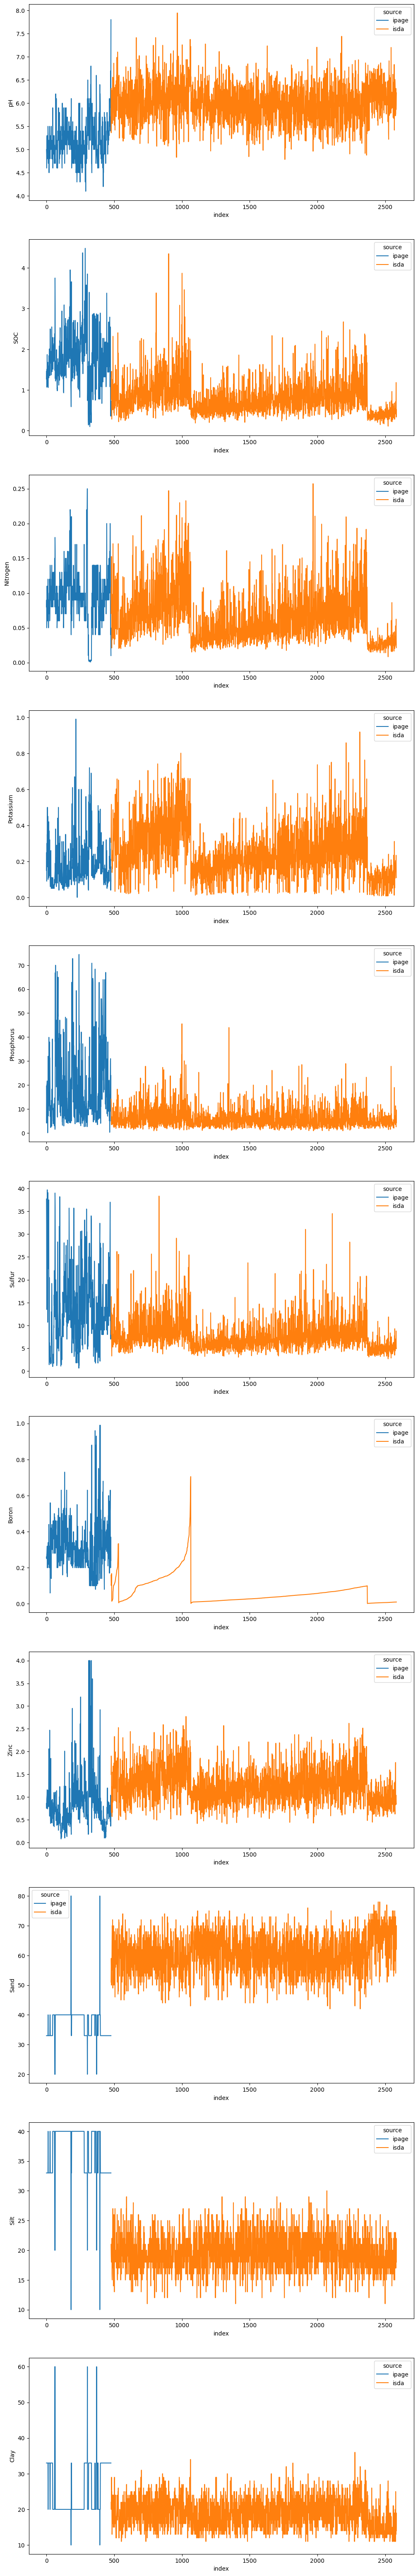

In [7]:
fig, axes = plt.subplots(len(data.columns)-2, 1, figsize=(12,8*10))
for i,col in enumerate(data.columns[1:-1]):
    sns.lineplot(data=data.reset_index(),x='index',y=col,hue='source',ax=axes[i])

In [8]:
#### why is the Boron values from isda data so smooth?

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'pH'}>, <Axes: title={'center': 'SOC'}>,
        <Axes: title={'center': 'Nitrogen'}>],
       [<Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'Phosphorus'}>,
        <Axes: title={'center': 'Sulfur'}>,
        <Axes: title={'center': 'Boron'}>],
       [<Axes: title={'center': 'Zinc'}>,
        <Axes: title={'center': 'Sand'}>,
        <Axes: title={'center': 'Silt'}>,
        <Axes: title={'center': 'Clay'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

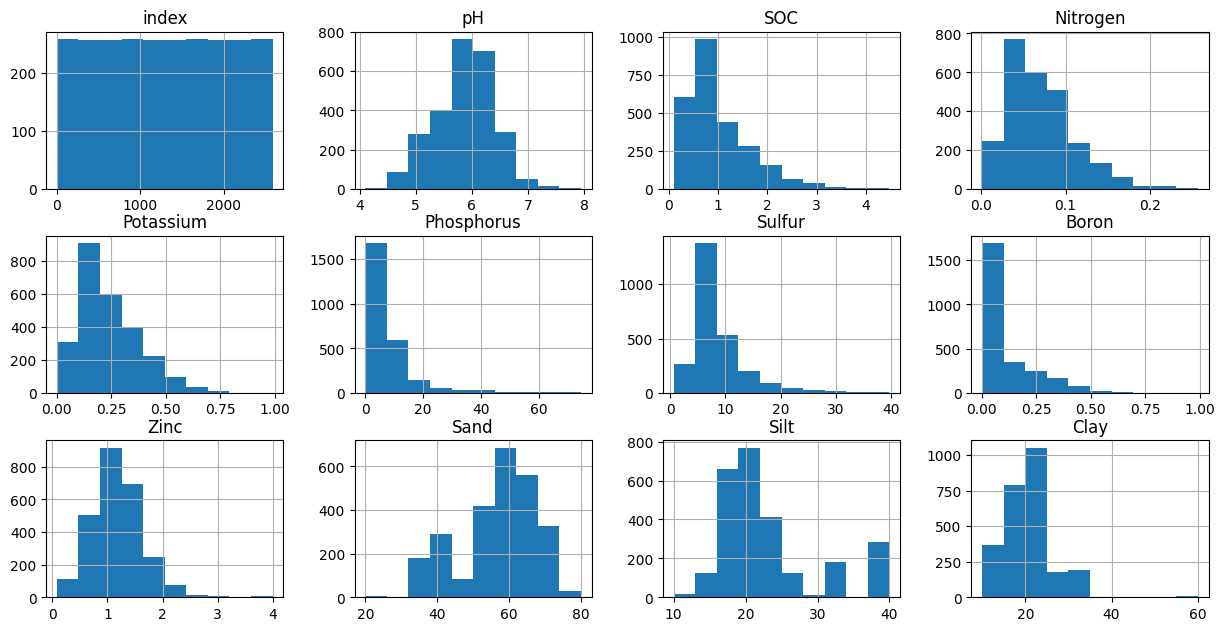

In [10]:
# checking the distribution of the variables
data.hist(bins=10, figsize=(15, 10), layout=(4, 4))

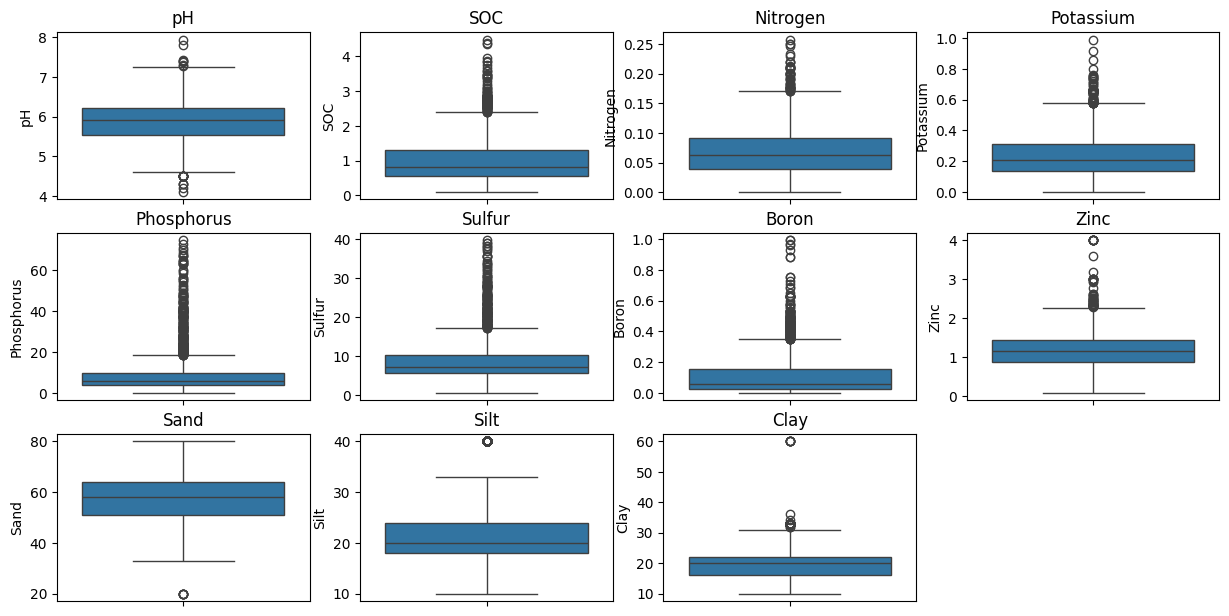

In [22]:
#Boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=['float64']).columns,1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)

<Axes: >

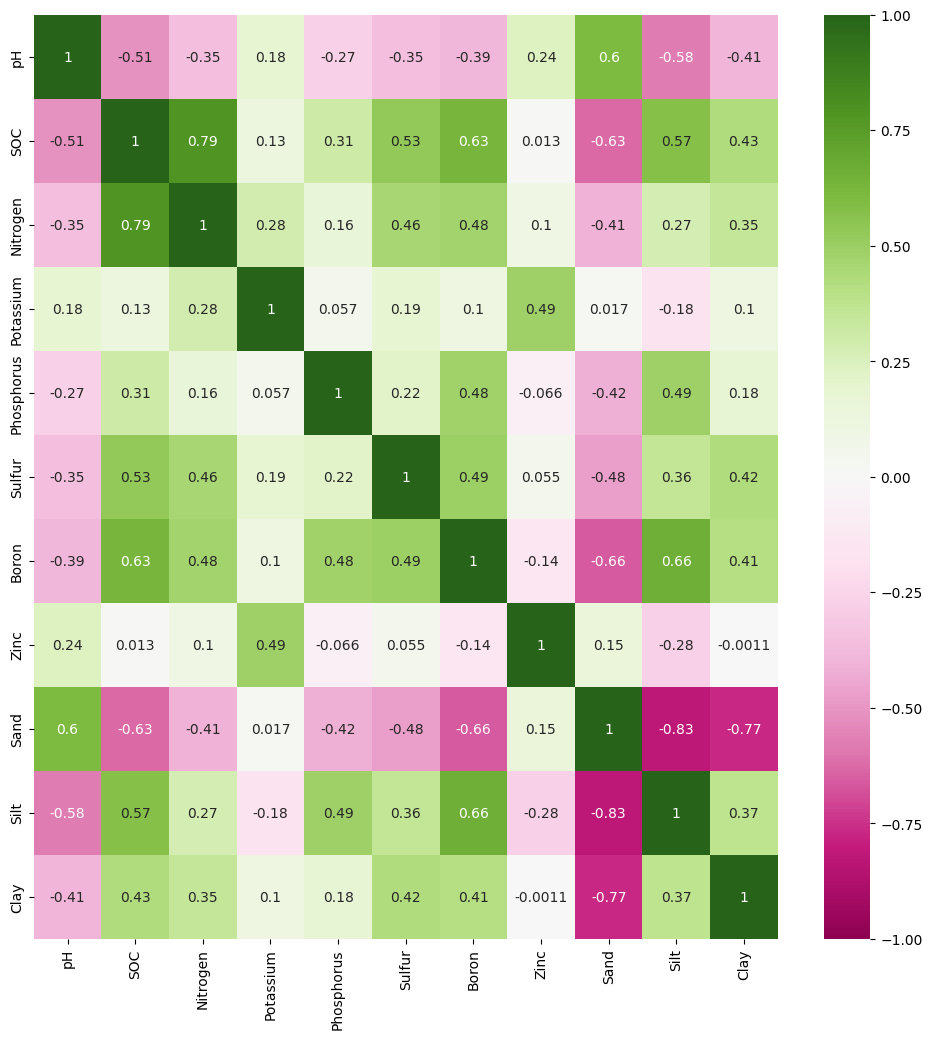

In [20]:
# correlation map
plt.figure(figsize=(12,12))
correlation = data.drop(columns=['source','index']).corr()
sns.heatmap(correlation, annot=True, cmap="PiYG",vmin=-1, vmax=1, center=0)